In [117]:
import numpy as np
import matplotlib.pyplot as plt
import random
from Random_processes.graph_tools import find_stationary_matrices

### Задание
![Задание](mark_task/marketing_task.png)

In [118]:
random.seed(0)
np.random.seed(0)
k = 3
i = 3
j = 3
p = np.random.rand(3, 3, 3)
p = -np.sort(-p)
p = p[:, :, np.arange(k)] / np.sum(p, axis=2, keepdims=True)

R = np.random.rand(3, 3, 3)
R = -np.sort(-R)
R = R[:, :, np.arange(k)] / np.sum(R, axis=2, keepdims=True)
r = 270*R + 30

c = 20 * np.random.rand(3) + 10
c = -np.sort(-c)
beta = np.random.rand(1)

### Постановка задачи
![Задание](mark_task/Общая_задача.png)

In [ ]:
print(R[2, :, :])
print(r[2, :, :])

### Неуправляемый режим (k = 3)

In [120]:
P = p[2, :, :]
R_2 = R[2, :, :]
r_2 = r[2, :, :]
c_2 = c[2]
#plot_graph(P, "Вероятности перехода между i-ми состояниями")
#plot_graph(r_2, "Вероятности получения дохода", states=["Отличный", "средний", "посредственный"])

### Управляемый режим
![Задание](mark_task/Алгоритм_полного_перебора.png)

In [ ]:
v_k_i = np.sum(p * r, axis=2) - c.reshape(3, 1)
#print(v_k_i)

#print(p)
pi_k = find_stationary_matrices(p)
pi_k = pi_k[:, 1, :].reshape((3, 3))

#print(pi_k)
E = np.sum(v_k_i * pi_k, axis=1)
#print(E)

print(v_k_i.reshape(3, 3, 1))

[[100.56423623 111.21895733 112.40742453]
 [103.22603562 121.44359328 110.4894662 ]
 [115.44803042 144.89949884 155.33513452]]


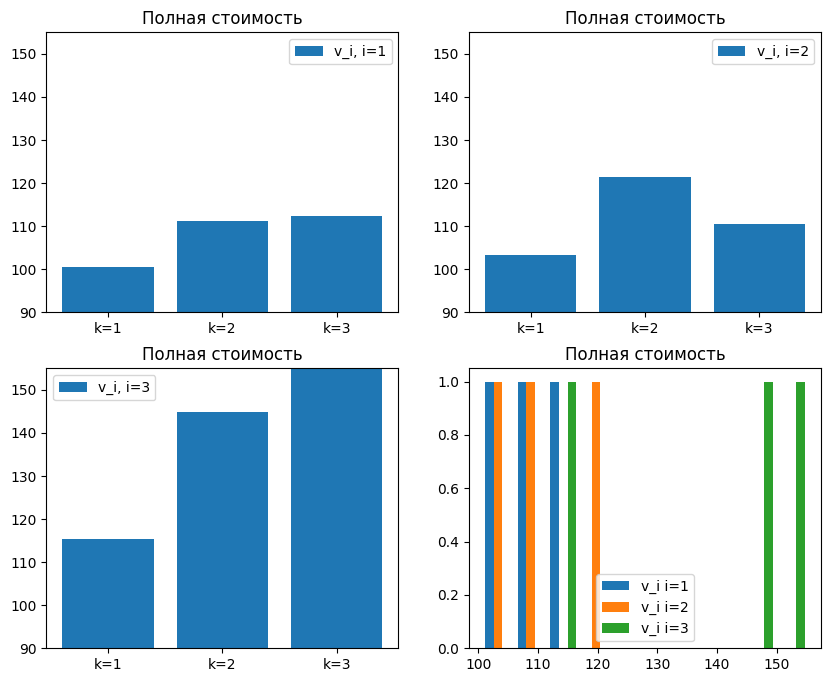

In [122]:
plt.figure(figsize=(10, 8))
vv = v_k_i.T
print(vv)
# Первый график
plt.subplot(2, 2, 1)  # 2 строки, 2 столбца, первая ячейка
plt.bar(["k=1", "k=2", "k=3"], vv[0], label="v_i, i=1")
plt.ylim(90, 155)
plt.title("Полная стоимость")
plt.legend()

# Второй график
plt.subplot(2, 2, 2)  # 2 строки, 2 столбца, первая ячейка
plt.bar(["k=1", "k=2", "k=3"], vv[1], label="v_i, i=2")
plt.ylim(90, 155)
plt.title("Полная стоимость")
plt.legend()

# Третий график
plt.subplot(2, 2, 3)  # 2 строки, 2 столбца, первая ячейка
plt.bar(["k=1", "k=2", "k=3"], vv[2], label="v_i, i=3")
plt.ylim(90, 155)
plt.title("Полная стоимость")
plt.legend()

vv = vv.T
plt.subplot(2, 2, 4)  # 2 строки, 2 столбца, первая ячейка
plt.hist(vv, label=["v_i i=1", "v_i i=2", "v_i i=3"])
plt.title("Полная стоимость")
plt.legend()
plt.show()

### Алгоритм для поиска стратегии
![Задание](mark_task/итер_для_поиска_стратегии.png)

In [123]:
def get_optimal_strategy():
    optimal = -np.ones(k, dtype=int)
    kk = np.zeros(k, dtype=int)

    while np.any(kk != optimal):
        optimal = kk

        SLAU = np.zeros((k + 1, k + 1))
        b = np.zeros(k + 1)
        SLAU[:k, 0] = 1

        for i in range(k + 1):
            if i < k:
                SLAU[i, 1:] = -p[kk[i], i, :]
                SLAU[i, i+1] += 1
                b[i] = v_k_i[kk[i], i]
            else:
                SLAU[i, i] = 1
                b[i] = 0

        coefs = np.linalg.solve(SLAU, b)

        f_s = coefs[1:]
        kk = np.argmax(np.sum(p * r, axis=2, keepdims=True) - c.reshape(3, 1, 1) + np.sum(p * f_s, axis=2, keepdims=True), axis=0)

    return optimal, coefs[0]

def get_optimal_discounted_strategy():
    optimal = -np.ones(k, dtype=int)
    kk = np.zeros(k, dtype=int)

    while np.any(kk != optimal):
        optimal = kk

        SLAU = np.zeros((k, k))
        b = np.zeros(k )

        for i in range(k):

            SLAU[i, :] = -beta * p[kk[i], i, :]
            SLAU[i, i] += 1
            b[i] = v_k_i[kk[i], i]

        coefs = np.linalg.solve(SLAU, b)

        kk = np.argmax(np.sum(p * r, axis=2, keepdims=True) - c.reshape(3, 1, 1) + beta * np.sum(p * coefs, axis=2, keepdims=True), axis=0)

    return optimal


print(get_optimal_strategy()[0] + 1, get_optimal_strategy()[1])
print(get_optimal_discounted_strategy() + 1)

[[3]
 [2]
 [3]] 123.25903839437862
[[3]
 [2]
 [3]]


C:\Users\User\AppData\Local\Temp\ipykernel_81688\79229923.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b[i] = v_k_i[kk[i], i]
C:\Users\User\AppData\Local\Temp\ipykernel_81688\79229923.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b[i] = v_k_i[kk[i], i]
